### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [166]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt   

import seaborn as sns

sns.set(color_codes=True)

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [167]:
data = pd.read_csv('Data.csv') # data.csv: contains information of ratings given by the users to a particular movie

item = pd.read_csv('item.csv') # item.csv: contains information related to the movies and its genre

user = pd.read_csv('user.csv') # user.csv: contains information of the users who have rated the movies

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

#### (a) - (Data.csv) Analysing information of ratings given by the users to a particular movie 

In [168]:
data.shape #shape of data - number of rows and columns

(100000, 4)

In [169]:
data.info() #checking for general information on the data set including data type and checks for null entries 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [170]:
data.describe() # measure of central tendencies and dispersion of the data

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [171]:
pd.DataFrame( data.isnull().sum(), columns= ['Number of missing values']) #number of missing values 

,Number of missing values
user id,0
movie id,0
rating,0
timestamp,0


#### (b) -(item.csv) Analysing information related to the movies and its genre 

In [172]:
item.shape

(1681, 22)

In [173]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-null int64
Animation       1681 non-null int64
Childrens       1681 non-null int64
Comedy          1681 non-null int64
Crime           1681 non-null int64
Documentary     1681 non-null int64
Drama           1681 non-null int64
Fantasy         1681 non-null int64
Film-Noir       1681 non-null int64
Horror          1681 non-null int64
Musical         1681 non-null int64
Mystery         1681 non-null int64
Romance         1681 non-null int64
Sci-Fi          1681 non-null int64
Thriller        1681 non-null int64
War             1681 non-null int64
Western         1681 non-null int64
dtypes: int64(20), object(2)
memory usage: 289.0+ KB


In [174]:
item.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [175]:
pd.DataFrame( item.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
movie id,0
movie title,0
release date,0
unknown,0
Action,0
Adventure,0
Animation,0
Childrens,0
Comedy,0
Crime,0


#### (c)  (user.csv) - Analysing information of the users who have rated the movies

In [176]:
user.shape

(943, 5)

In [177]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [178]:
user.describe().round() #round the figure due to age

,user id,age
count,943.0,943.0
mean,472.0,34.0
std,272.0,12.0
min,1.0,7.0
25%,236.0,25.0
50%,472.0,31.0
75%,708.0,43.0
max,943.0,73.0


In [179]:
pd.DataFrame( user.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
user id,0
age,0
gender,0
occupation,0
zip code,0


#### 4. Find the number of movies per genre using the item data - 5 marks

#### 4. Number of movies per genre using the item Data

In [180]:
# from item.shape we have a total of 22 columns. We will reference from columns 3 to 23 to skip the first 3 columns
# the first three column is not relevant at this point
pd.DataFrame(item.iloc[:,3:23].sum(), columns= ['Number of movies per genre'])

,Number of movies per genre
unknown,1
Action,251
Adventure,135
Animation,42
Childrens,122
Comedy,505
Crime,109
Documentary,50
Drama,725
Fantasy,22


#### 5. Find the movies that have more than one genre - 2.5 marks

#### 5. Movies with more than one genre

In [181]:
m = item.iloc[:,3:23].join(item['movie title'], how = 'left') # add 'movie title column to the already selected genre'
cols = list(m.columns)          #this line of code and the next two moves the movie title column to the first position from
cols = [cols[-1]] + cols[:-1]   #the left of the genre.
cols
m = m[cols]
m.head()

,movie title,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,GoldenEye,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Four Rooms,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Get Shorty,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Copycat,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [182]:
indexing = m.set_index('movie title') #set movie title as index so as to be visible when carrying out sum on row by row basis
g = indexing.sum(axis=1)
#g.tail(15)
df = pd.DataFrame(g, columns=['score']) #add a dataframe with score as the column name which is sum of rows 
pd.DataFrame(df[ df['score']>1].index) # displays the movie titles with more than one genre

,movie title
0,Toy Story
1,GoldenEye
2,Get Shorty
3,Copycat
4,Twelve Monkeys
...,...
844,MURDER and murder
845,Tainted
846,Mirage
847,B. Monkey


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [183]:
aa = item.drop(columns=['unknown'],axis=1) #hint: use sum on the axis = 1
aa.head(3) #column 'unknown dropped'

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [184]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [185]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [186]:
user.head(2) #your answers here

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043


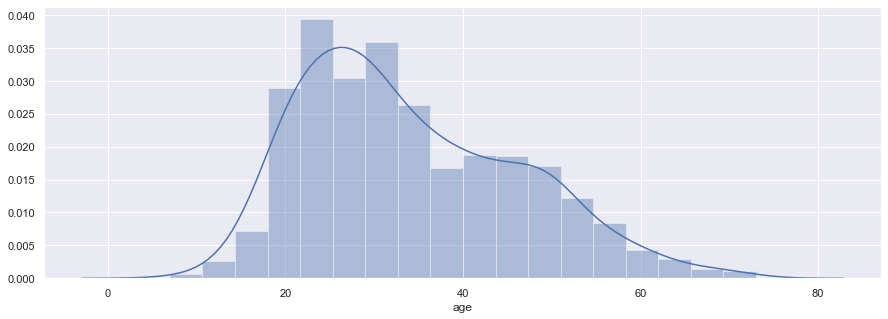

In [187]:
plt.figure(figsize =(15,5))
user_age= user['age'] # get age column from User dataframe
sns.distplot(user_age);

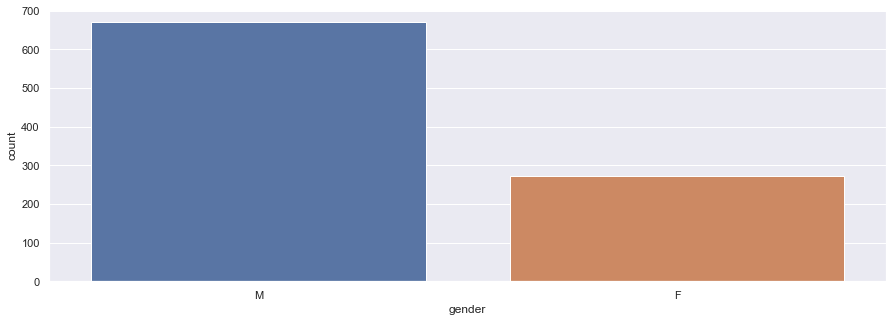

In [188]:
plt.figure(figsize =(15,5))
user_gen = user['gender'] # get gender column from User dataframe
sns.countplot(user_gen);

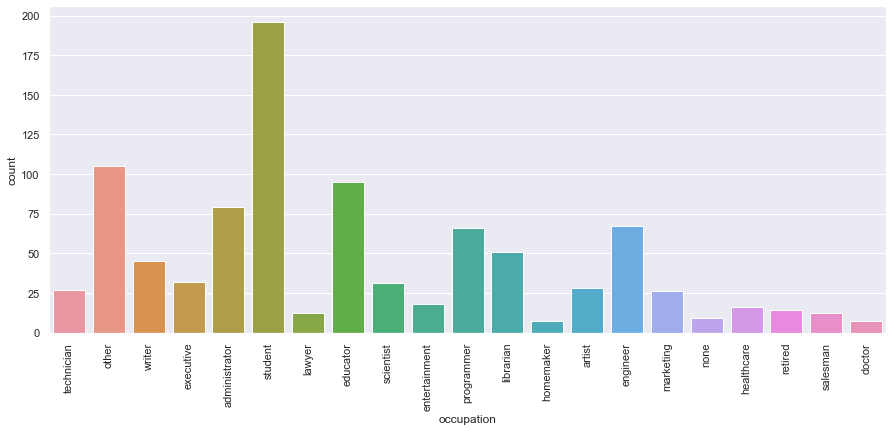

In [189]:
plt.figure(figsize =(15,6))
user_occu = user['occupation'] # get occupation column from User dataframe
sns.countplot(user_occu);
plt.xticks(rotation=90);

In [190]:
data.head(2)

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742


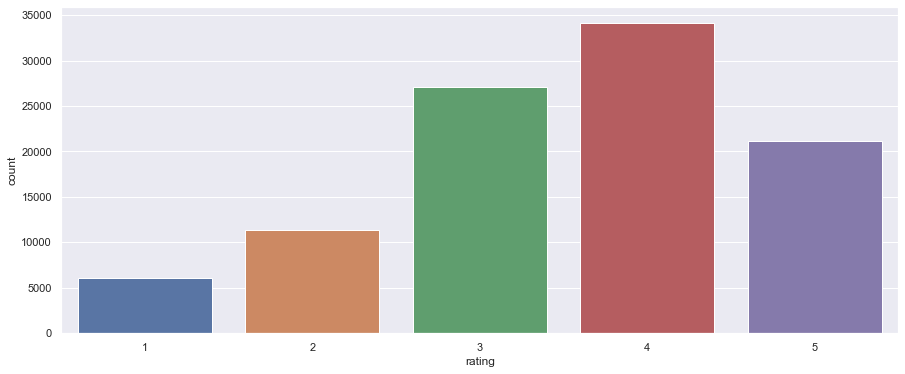

In [191]:
plt.figure(figsize =(15,6))
data_ratn = data['rating']  # get rating column from data dataframe
sns.countplot(data_ratn);

In [192]:
item.head(2)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [193]:
# new data frame with split value columns containing years
new = item['release date'].str.split('-', expand = True) 
#item['day']= new[0]         # adding seperated day column to data item
#item['month']= new[1]       # adding seperated day column to data item
item['year']= new[2]        # adding seperated day column to data item
item.head(3)               #release year seen at the last column on the right side of the dataframe below 

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995


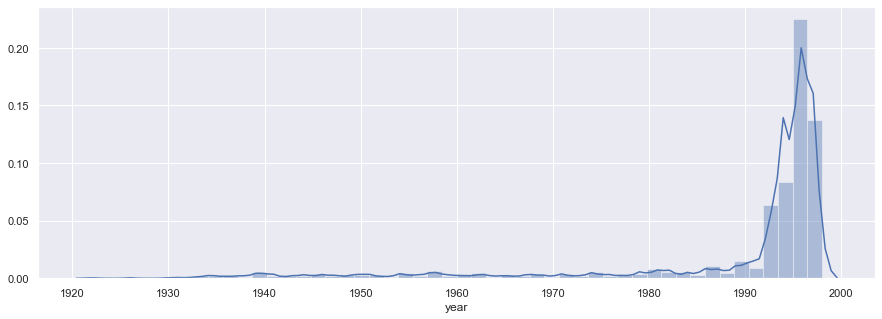

In [194]:
plt.figure(figsize =(15,5))
years_col= item['year'] # get age column from item dataframe
sns.distplot(years_col);

In [195]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [196]:
m = item.iloc[:,4:24]   #move the year column to the begining of the table (left) after the indexing

cols = list(m.columns)

cols = [cols[-1]] + cols[:-1]

m = m[cols]

m.head(3)

,year,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1995,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1995,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [197]:
#unpivot the above Dataframe into rows using melt function with all column variables stacked under 'variables'
#and corresponding values stacked in column 'value'

m.melt(id_vars='year')

,year,variable,value
0,1995,Action,0
1,1995,Action,1
2,1995,Action,0
3,1995,Action,1
4,1995,Action,0
...,...,...,...
30253,1998,Western,0
30254,1998,Western,0
30255,1998,Western,0
30256,1994,Western,0


In [202]:
df = m.melt(id_vars='year') # add to object df

groupings = df.groupby(['year', 'variable'])['value'].sum().reset_index() #easier to sum column axis and group 

groupings.tail(30)

,year,variable,value
1248,1997,Documentary,6
1249,1997,Drama,113
1250,1997,Fantasy,4
1251,1997,Film-Noir,2
1252,1997,Horror,8
1253,1997,Musical,5
1254,1997,Mystery,18
1255,1997,Romance,51
1256,1997,Sci-Fi,13
1257,1997,Thriller,54


In [199]:
groupings.columns = ['year', 'Genre','number of releases'] # Re-label columns for convenience 
groupings.head()

,year,Genre,number of releases
0,1922,Action,0
1,1922,Adventure,0
2,1922,Animation,0
3,1922,Childrens,0
4,1922,Comedy,0


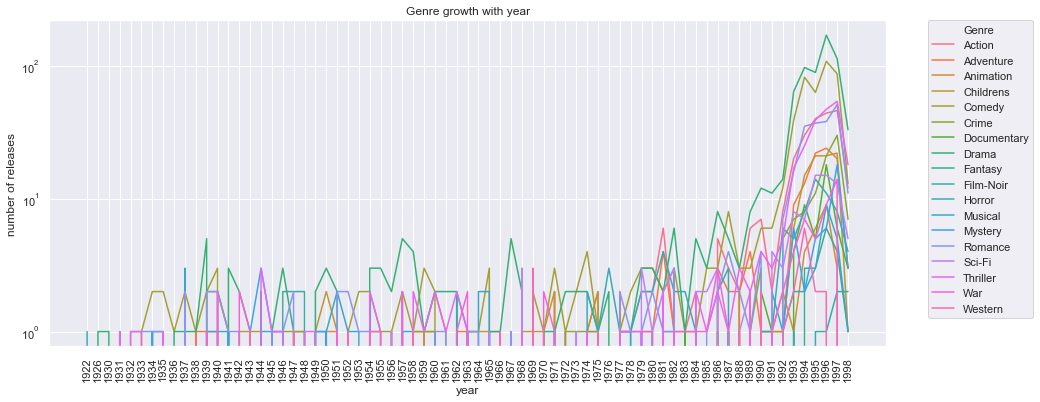

In [200]:
plt.figure(figsize =(15,6))

sns.lineplot(groupings['year'], groupings['number of releases'], hue = groupings['Genre']);

plt.xticks(rotation=90);

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

plt.yscale('log');

plt.title('Genre growth with year');

  #####  The number of releases increases as the year progresses and increased rapidly after 1991

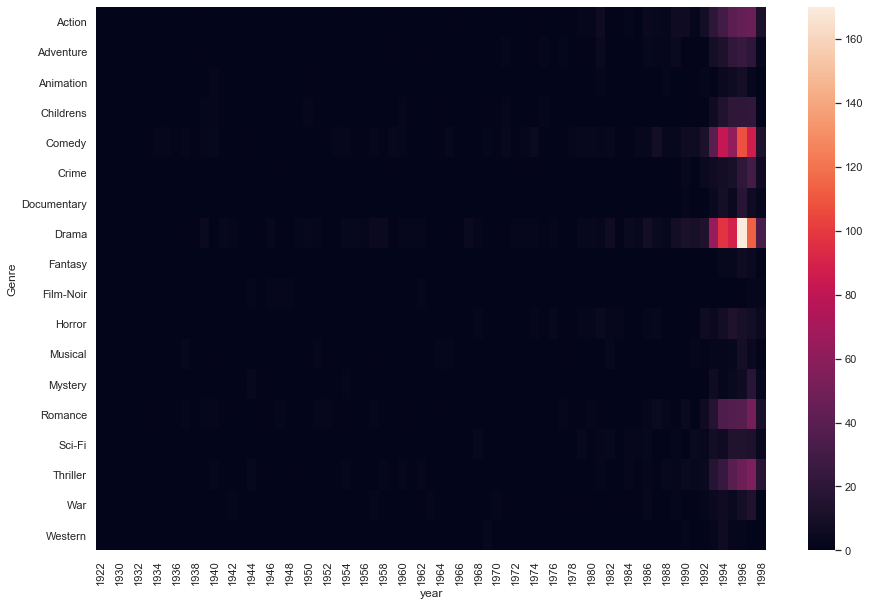

In [201]:
plt.figure(figsize =(15,10))
H = groupings.pivot('Genre', 'year', 'number of releases')
ax = sns.heatmap(H)

### 9. Find the top 25 movies, each having a minimum of 100 ratings - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [36]:
data.head() #recall the data frame data

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [37]:
df1= data.groupby(['movie id']).sum() #sum by movie id to get the sum of ratings for a giving movie id
df1.head(5)

,user id,rating,timestamp
movie id,,,
1,215609,1753,399028021059
2,64453,420,115727673079
3,41322,273,79400420109
4,98125,742,184487964275
5,37786,284,75902581757


In [38]:
df2 = df1[df1['rating'] >= 100] #Filter all the ratings equal to or higher than 100
df2.head()


,user id,rating,timestamp
movie id,,,
1,215609,1753,399028021059
2,64453,420,115727673079
3,41322,273,79400420109
4,98125,742,184487964275
5,37786,284,75902581757


In [39]:
df2.reset_index() #remove the index in movie ID

,movie id,user id,rating,timestamp
0,1,215609,1753,399028021059
1,2,64453,420,115727673079
2,3,41322,273,79400420109
3,4,98125,742,184487964275
4,5,37786,284,75902581757
...,...,...,...,...
766,1220,12839,100,26467854358
767,1221,19659,136,34495823642
768,1226,15267,108,28329096471
769,1228,22810,118,42386511650


In [40]:
df3 = pd.merge(df2,data, how='inner',on='movie id') #merge table so the grouped table re-distributes into the original data
df3

,movie id,user id_x,rating_x,timestamp_x,user id_y,rating_y,timestamp_y
0,1,215609,1753,399028021059,308,4,887736532
1,1,215609,1753,399028021059,287,5,875334088
2,1,215609,1753,399028021059,148,4,877019411
3,1,215609,1753,399028021059,280,4,891700426
4,1,215609,1753,399028021059,66,3,883601324
...,...,...,...,...,...,...,...
90496,1244,17636,105,31784062673,749,3,878847101
90497,1244,17636,105,31784062673,907,5,880159381
90498,1244,17636,105,31784062673,880,3,880167411
90499,1244,17636,105,31784062673,347,3,881653300


In [41]:
df4 = df3.groupby(['movie id']).mean() #average out using movie id to group
df5 = df4.reset_index()
df5


,movie id,user id_x,rating_x,timestamp_x,user id_y,rating_y,timestamp_y
0,1,215609.0,1753.0,3.990280e+11,477.011062,3.878319,8.828054e+08
1,2,64453.0,420.0,1.157277e+11,492.007634,3.206107,8.834174e+08
2,3,41322.0,273.0,7.940042e+10,459.133333,3.033333,8.822269e+08
3,4,98125.0,742.0,1.844880e+11,469.497608,3.550239,8.827175e+08
4,5,37786.0,284.0,7.590258e+10,439.372093,3.302326,8.825882e+08
...,...,...,...,...,...,...,...
766,1220,12839.0,100.0,2.646785e+10,427.966667,3.333333,8.822618e+08
767,1221,19659.0,136.0,3.449582e+10,504.076923,3.487179,8.845083e+08
768,1226,15267.0,108.0,2.832910e+10,477.093750,3.375000,8.852843e+08
769,1228,22810.0,118.0,4.238651e+10,475.208333,2.458333,8.830523e+08


In [42]:
df6 = df5.sort_values(by=['rating_x'], ascending=False) #sort the table to to give the ratings in descending order.
df6

,movie id,user id_x,rating_x,timestamp_x,user id_y,rating_y,timestamp_y
42,50,274817.0,2541.0,5.148042e+11,471.384220,4.358491,8.830261e+08
88,100,231486.0,2111.0,4.484377e+11,455.681102,4.155512,8.827515e+08
158,181,240820.0,2032.0,4.475484e+11,474.990138,4.007890,8.827384e+08
232,258,235005.0,1936.0,4.499931e+11,461.699411,3.803536,8.840730e+08
151,174,199104.0,1786.0,3.708826e+11,474.057143,4.252381,8.830537e+08
...,...,...,...,...,...,...,...
621,783,15657.0,101.0,3.266877e+10,423.162162,2.729730,8.829397e+08
746,1079,21458.0,101.0,3.968709e+10,476.844444,2.244444,8.819354e+08
760,1149,14150.0,100.0,2.301699e+10,544.230769,3.846154,8.852690e+08
754,1129,13076.0,100.0,2.469343e+10,467.000000,3.571429,8.819081e+08


In [43]:
df7 = item   #import the item table with the movie titles so as to merge with the ordered ratings. 
df7.head(3)  #with the movie id as part of the column, it will be easier to identify the movies title 

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995


In [44]:
df8 = df7.iloc[:,0:2] # I am interested in the movie id and movie title 
df8

,movie id,movie title
0,1,Toy Story
1,2,GoldenEye
2,3,Four Rooms
3,4,Get Shorty
4,5,Copycat
...,...,...
1676,1678,Mat' i syn
1677,1679,B. Monkey
1678,1680,Sliding Doors
1679,1681,You So Crazy


In [45]:
df9 = pd.merge(df6,df8, how='inner',on='movie id') #merge to redistribute table with movie title into table with ratings 
df9

,movie id,user id_x,rating_x,timestamp_x,user id_y,rating_y,timestamp_y,movie title
0,50,274817.0,2541.0,5.148042e+11,471.384220,4.358491,8.830261e+08,Star Wars
1,100,231486.0,2111.0,4.484377e+11,455.681102,4.155512,8.827515e+08,Fargo
2,181,240820.0,2032.0,4.475484e+11,474.990138,4.007890,8.827384e+08,Return of the Jedi
3,258,235005.0,1936.0,4.499931e+11,461.699411,3.803536,8.840730e+08,Contact
4,174,199104.0,1786.0,3.708826e+11,474.057143,4.252381,8.830537e+08,Raiders of the Lost Ark
...,...,...,...,...,...,...,...,...
766,783,15657.0,101.0,3.266877e+10,423.162162,2.729730,8.829397e+08,Milk Money
767,1079,21458.0,101.0,3.968709e+10,476.844444,2.244444,8.819354e+08,Joe's Apartment
768,1149,14150.0,100.0,2.301699e+10,544.230769,3.846154,8.852690e+08,Walkabout
769,1129,13076.0,100.0,2.469343e+10,467.000000,3.571429,8.819081e+08,Chungking Express


In [46]:
df10 = df9[df9.rating_x >=100] # use the condition to filter out the movies corresponding to the ratings 
df10

,movie id,user id_x,rating_x,timestamp_x,user id_y,rating_y,timestamp_y,movie title
0,50,274817.0,2541.0,5.148042e+11,471.384220,4.358491,8.830261e+08,Star Wars
1,100,231486.0,2111.0,4.484377e+11,455.681102,4.155512,8.827515e+08,Fargo
2,181,240820.0,2032.0,4.475484e+11,474.990138,4.007890,8.827384e+08,Return of the Jedi
3,258,235005.0,1936.0,4.499931e+11,461.699411,3.803536,8.840730e+08,Contact
4,174,199104.0,1786.0,3.708826e+11,474.057143,4.252381,8.830537e+08,Raiders of the Lost Ark
...,...,...,...,...,...,...,...,...
766,783,15657.0,101.0,3.266877e+10,423.162162,2.729730,8.829397e+08,Milk Money
767,1079,21458.0,101.0,3.968709e+10,476.844444,2.244444,8.819354e+08,Joe's Apartment
768,1149,14150.0,100.0,2.301699e+10,544.230769,3.846154,8.852690e+08,Walkabout
769,1129,13076.0,100.0,2.469343e+10,467.000000,3.571429,8.819081e+08,Chungking Express


In [47]:
#Top 25 movies with high ratings 
F = df10.iloc[0:25,-1] # using iloc to reference the column of interest
F


0                              Star Wars 
1                                  Fargo 
2                     Return of the Jedi 
3                                Contact 
4                Raiders of the Lost Ark 
5                         Godfather, The 
6                   English Patient, The 
7                              Toy Story 
8              Silence of the Lambs, The 
9                                 Scream 
10                          Pulp Fiction 
11                         Air Force One 
12              Empire Strikes Back, The 
13                             Liar Liar 
14                        Twelve Monkeys 
15                               Titanic 
16                Independence Day (ID4) 
17                         Jerry Maguire 
18                             Rock, The 
19                         Fugitive, The 
20                   Princess Bride, The 
21                    Back to the Future 
22              Star Trek: First Contact 
23                      Schindler'

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [48]:
df11 = user #bringing back the user data with the gender
df11.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [49]:
df12 = data #bringing back the data with ratings 
df12

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [50]:
df13 = pd.merge(df11,df12, how='inner',on='user id') # doing the mixing or merging to have both gener and rating in a dataframe
df13

,user id,age,gender,occupation,zip code,movie id,rating,timestamp
0,1,24,M,technician,85711,61,4,878542420
1,1,24,M,technician,85711,189,3,888732928
2,1,24,M,technician,85711,33,4,878542699
3,1,24,M,technician,85711,160,4,875072547
4,1,24,M,technician,85711,20,4,887431883
...,...,...,...,...,...,...,...,...
99995,943,22,M,student,77841,415,1,888640027
99996,943,22,M,student,77841,219,4,888639575
99997,943,22,M,student,77841,796,3,888640311
99998,943,22,M,student,77841,739,4,888639929


In [217]:
df7
df7.head(3)
a = list(df7.columns)
a

['movie id',
 'movie title',
 'release date',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 'Childrens',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western',
 'year']

In [213]:
df14= df7.drop(df7.iloc[:,1:22], axis=1) # looking at adding time and movie id into the picture 
df14

# df[['Name', 'Qualification']] getting two colums out of tables 
 

,movie id,year
0,1,1995
1,2,1995
2,3,1995
3,4,1995
4,5,1995
...,...,...
1676,1678,1998
1677,1679,1998
1678,1680,1998
1679,1681,1994


In [53]:
groupings  #bringing in genre column into the basket 

,year,Genre,number of releases
0,1922,Action,0
1,1922,Adventure,0
2,1922,Animation,0
3,1922,Childrens,0
4,1922,Comedy,0
...,...,...,...
1273,1998,Romance,11
1274,1998,Sci-Fi,5
1275,1998,Thriller,18
1276,1998,War,0


In [54]:
df15 = pd.merge(df14,groupings, how='inner',on='year') #merging to provide genre, movie id, years and releases 
df15

,movie id,year,Genre,number of releases
0,1,1995,Action,40
1,1,1995,Adventure,22
2,1,1995,Animation,6
3,1,1995,Childrens,21
4,1,1995,Comedy,63
...,...,...,...,...
30253,1542,1926,Romance,0
30254,1542,1926,Sci-Fi,0
30255,1542,1926,Thriller,0
30256,1542,1926,War,0


In [55]:
df16 = pd.merge(df13,df15, how='inner',on='movie id') #final merged tabe to give all the information needed for analysis
df16

,user id,age,gender,occupation,zip code,movie id,rating,timestamp,year,Genre,number of releases
0,1,24,M,technician,85711,61,4,878542420,1994,Action,30
1,1,24,M,technician,85711,61,4,878542420,1994,Adventure,13
2,1,24,M,technician,85711,61,4,878542420,1994,Animation,4
3,1,24,M,technician,85711,61,4,878542420,1994,Childrens,15
4,1,24,M,technician,85711,61,4,878542420,1994,Comedy,82
...,...,...,...,...,...,...,...,...,...,...,...
1799833,916,27,M,engineer,N2L5N,1682,3,880845755,1996,Romance,38
1799834,916,27,M,engineer,N2L5N,1682,3,880845755,1996,Sci-Fi,15
1799835,916,27,M,engineer,N2L5N,1682,3,880845755,1996,Thriller,47
1799836,916,27,M,engineer,N2L5N,1682,3,880845755,1996,War,9


In [72]:
df17= df16[(df16['Genre']=='Drama')] #filtering out gender ratings based on genre = Drama
df17


,user id,age,gender,occupation,zip code,movie id,rating,timestamp,year,Genre,number of releases
7,1,24,M,technician,85711,61,4,878542420,1994,Drama,97
25,13,47,M,educator,29206,61,4,882140552,1994,Drama,97
43,18,35,F,other,37212,61,4,880130803,1994,Drama,97
61,58,27,M,programmer,52246,61,5,884305271,1994,Drama,97
79,59,49,M,educator,08403,61,4,888204597,1994,Drama,97
...,...,...,...,...,...,...,...,...,...,...,...
1799755,863,17,M,student,60089,1679,3,889289491,1998,Drama,33
1799773,863,17,M,student,60089,1678,1,889289570,1998,Drama,33
1799791,863,17,M,student,60089,1680,2,889289570,1998,Drama,33
1799809,896,28,M,writer,91505,1681,3,887160722,1994,Drama,97


In [150]:
df17.groupby(['gender'])['rating'].sum().reset_index() #more ratings from men than females 

,gender,rating
0,F,90894
1,M,262061


Text(0.5, 1.0, 'GENRE = DRAMA')

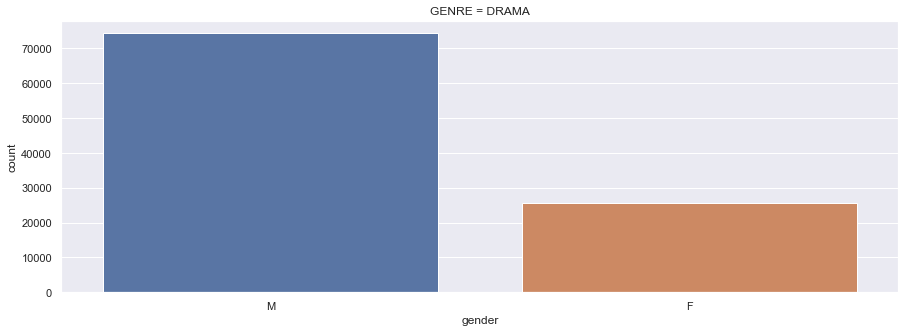

In [154]:
plt.figure(figsize =(15,5)) # count plot to show how many male or female watched the movie with genre = drama
X_MF= df17['gender']
sns.countplot(X_MF);
plt.title('GENRE = DRAMA')

#### The above plot shows that Men watch more drama than women

In [81]:
df18= df16[(df16['Genre']=='Sci-Fi')] 
df18

,user id,age,gender,occupation,zip code,movie id,rating,timestamp,year,Genre,number of releases
14,1,24,M,technician,85711,61,4,878542420,1994,Sci-Fi,7
32,13,47,M,educator,29206,61,4,882140552,1994,Sci-Fi,7
50,18,35,F,other,37212,61,4,880130803,1994,Sci-Fi,7
68,58,27,M,programmer,52246,61,5,884305271,1994,Sci-Fi,7
86,59,49,M,educator,08403,61,4,888204597,1994,Sci-Fi,7
...,...,...,...,...,...,...,...,...,...,...,...
1799762,863,17,M,student,60089,1679,3,889289491,1998,Sci-Fi,5
1799780,863,17,M,student,60089,1678,1,889289570,1998,Sci-Fi,5
1799798,863,17,M,student,60089,1680,2,889289570,1998,Sci-Fi,5
1799816,896,28,M,writer,91505,1681,3,887160722,1994,Sci-Fi,7


In [155]:
df18.groupby(['gender'])['rating'].sum().reset_index() #more ratings from men than females 

,gender,rating
0,F,90894
1,M,262061


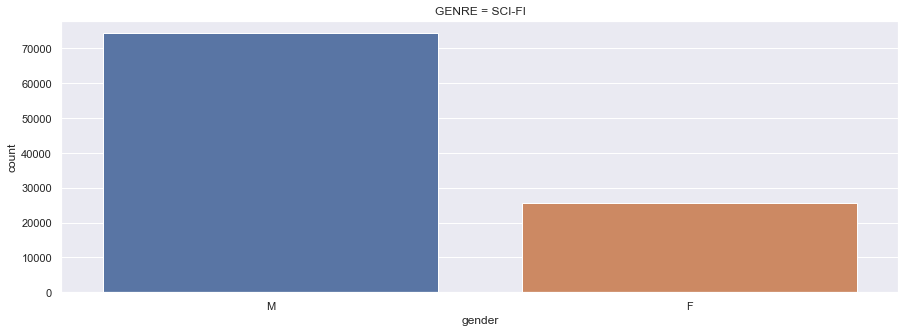

In [157]:
plt.figure(figsize =(15,5)) # plot for Sci-FI genry 
Y_MF= df18['gender']
sns.countplot(Y_MF);
plt.title('GENRE = SCI-FI');

#### The above plot shows that Men watch more Sci-Fi movies than women

In [85]:
df19= df16[(df16['Genre']=='Romance')] 
df19

,user id,age,gender,occupation,zip code,movie id,rating,timestamp,year,Genre,number of releases
13,1,24,M,technician,85711,61,4,878542420,1994,Romance,35
31,13,47,M,educator,29206,61,4,882140552,1994,Romance,35
49,18,35,F,other,37212,61,4,880130803,1994,Romance,35
67,58,27,M,programmer,52246,61,5,884305271,1994,Romance,35
85,59,49,M,educator,08403,61,4,888204597,1994,Romance,35
...,...,...,...,...,...,...,...,...,...,...,...
1799761,863,17,M,student,60089,1679,3,889289491,1998,Romance,11
1799779,863,17,M,student,60089,1678,1,889289570,1998,Romance,11
1799797,863,17,M,student,60089,1680,2,889289570,1998,Romance,11
1799815,896,28,M,writer,91505,1681,3,887160722,1994,Romance,35


In [158]:
df19.groupby(['gender'])['rating'].sum().reset_index() #more ratings from men than females 

,gender,rating
0,F,90894
1,M,262061


Text(0.5, 1.0, 'GENRE = ROMANCE')

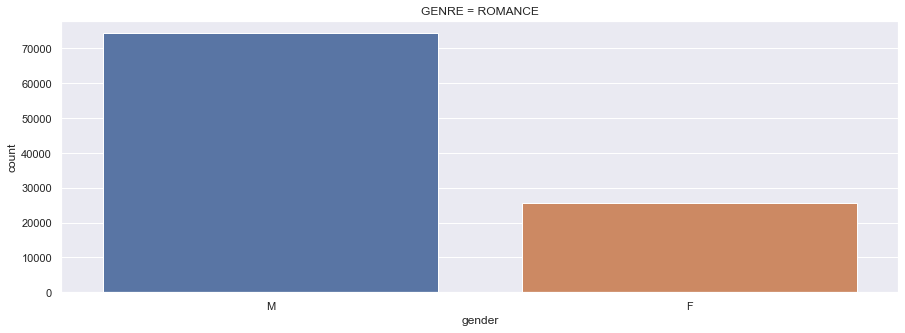

In [159]:
plt.figure(figsize =(15,5)) # plot for Sci-FI genry 
Z_MF= df18['gender']
sns.countplot(Z_MF);
plt.title('GENRE = ROMANCE')

### The above plot shows that Men watch more romance movies than women

#### Conclusion:

